In [167]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [168]:
ngo= pd.read_csv(r"C:\Users\Rohit Thanvi\Desktop\Country-data.csv")

In [169]:
ngo.head()


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [170]:
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [171]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [172]:
ngo.shape

(167, 10)

In [173]:
ngo.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [174]:
ngo.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

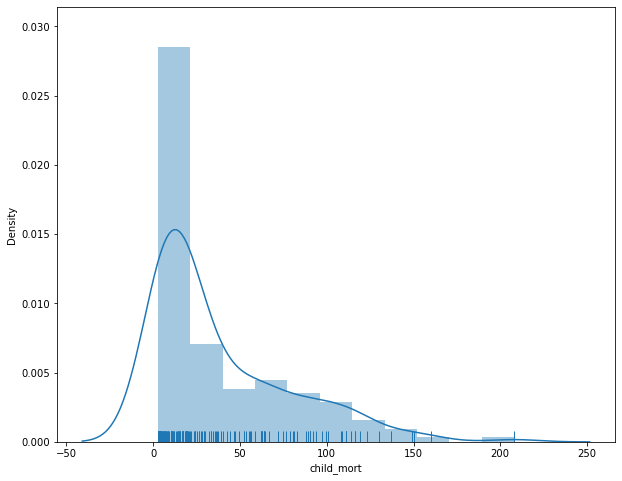

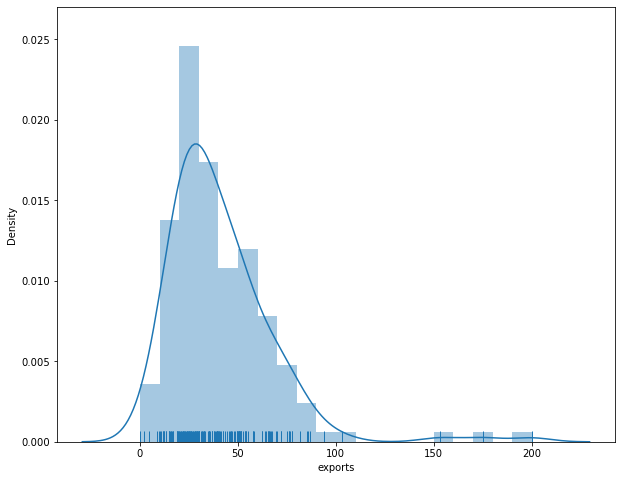

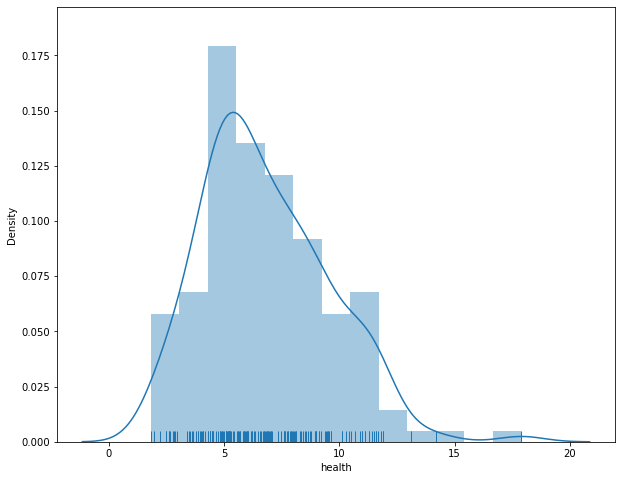

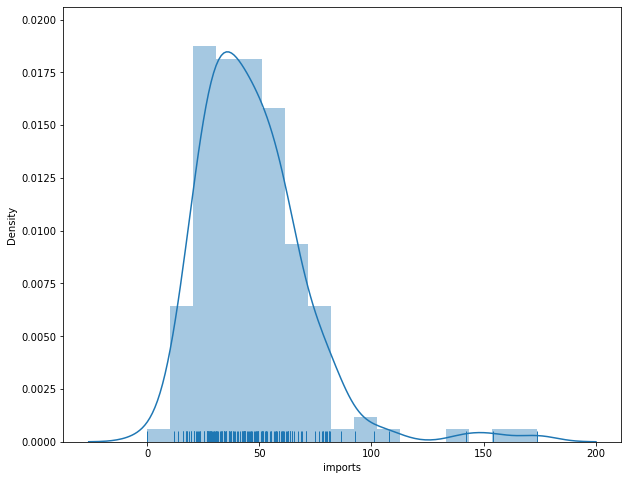

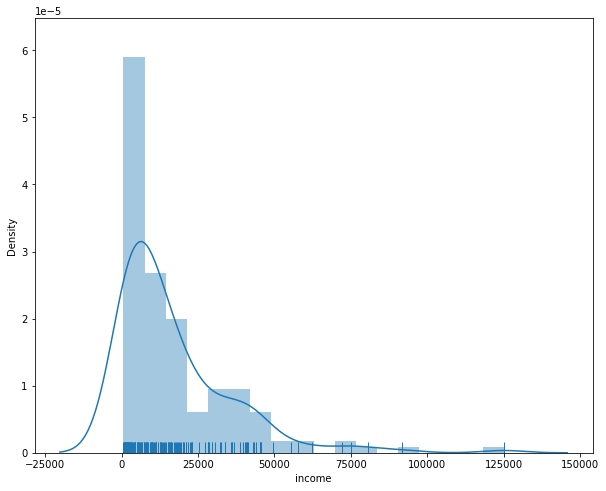

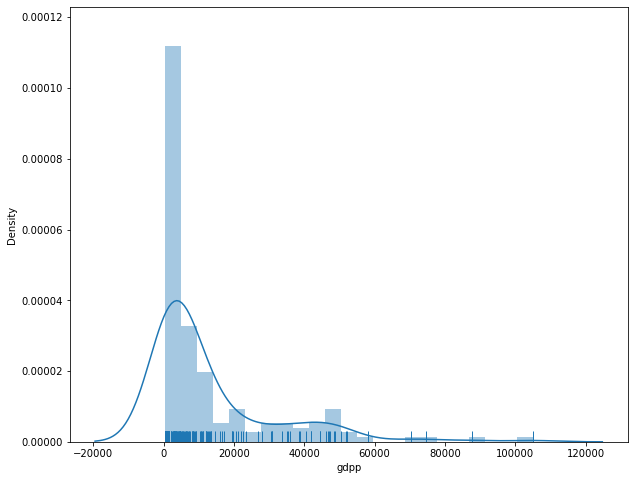

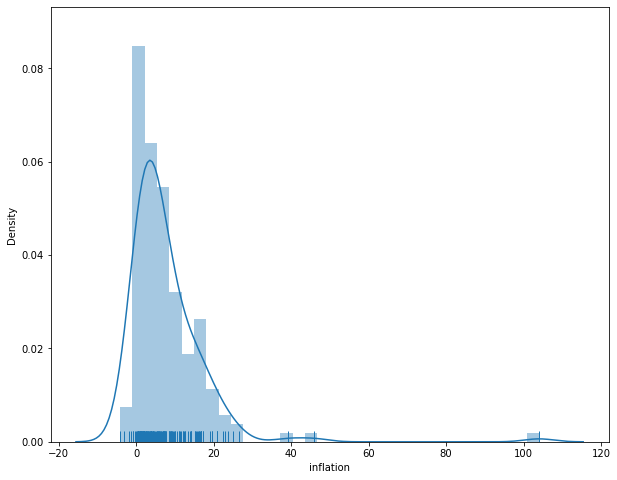

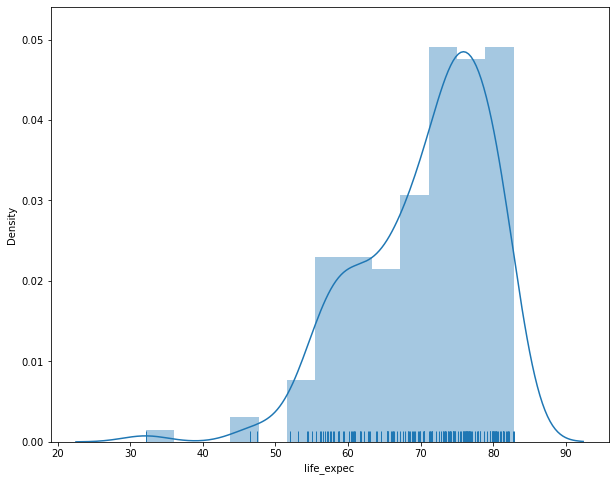

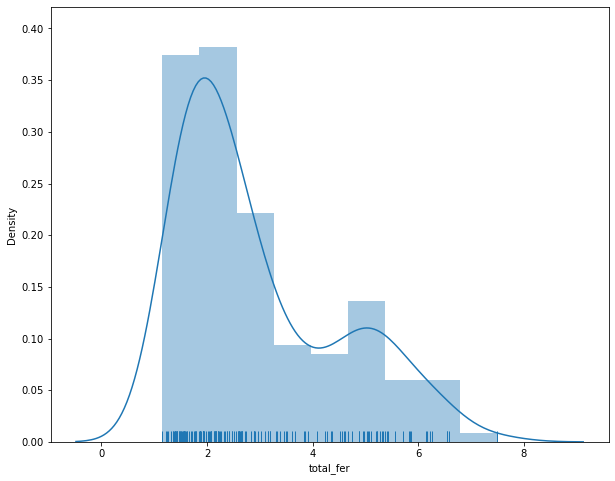

In [175]:
plt.figure(figsize = (10,8))
sns.distplot(ngo['child_mort'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['exports'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['health'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['imports'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['income'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['gdpp'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['inflation'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['life_expec'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(ngo['total_fer'][:200], rug=True,hist=True)
plt.show()



In [176]:
sns.pairplot(ngo)
plt.show()

In [177]:
ngo_1 = ngo[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]


In [178]:
ngo_1.value_counts().sum()

167

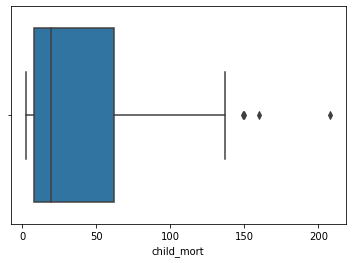

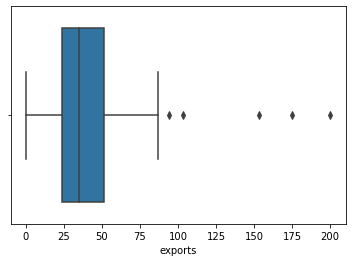

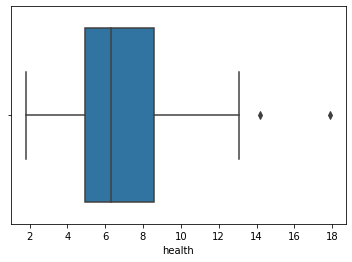

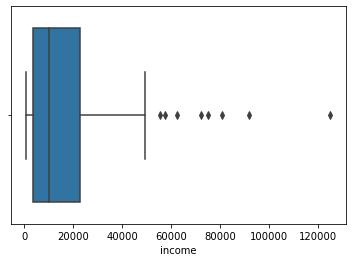

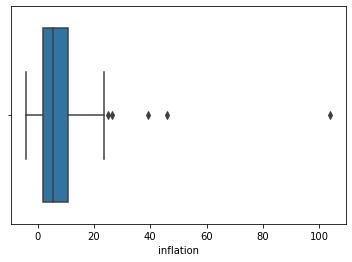

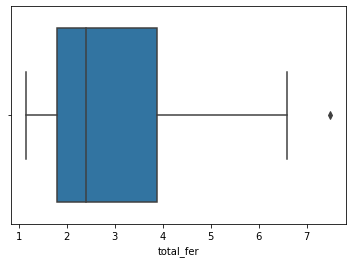

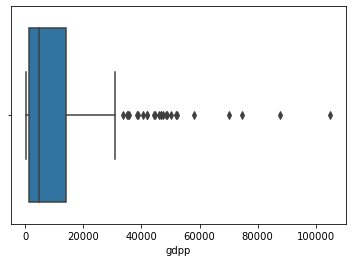

In [179]:
for i in ngo_1:
    sns.boxplot(ngo[i])
    plt.show()

In [180]:
q4 = round(ngo['exports'].quantile(0.99),2)
print(q4)

ngo['exports'][ngo['exports']>= q4] = q4

160.48


In [181]:
q4 = round(ngo['health'].quantile(0.99),2)
print(q4)

ngo['health'][ngo['health']>= q4] = q4

13.47


In [182]:
q4 = round(ngo['imports'].quantile(0.99),2)
print(q4)

ngo['imports'][ngo['imports']>= q4] = q4

146.08


In [183]:
q4 = round(ngo['inflation'].quantile(0.99),2)
print(q4)

ngo['inflation'][ngo['inflation']>= q4] = q4

41.48


In [184]:
q4 = round(ngo['income'].quantile(0.99),2)
print(q4)

ngo['income'][ngo['income']>= q4] = q4

84374.0


In [185]:
q4 = round(ngo['gdpp'].quantile(0.99),2)
print(q4)

ngo['gdpp'][ngo['gdpp']>= q4] = q4

79088.0


In [186]:
q4 = round(ngo['child_mort'].quantile(0.99),2)
print(q4)

ngo['child_mort'][ngo['child_mort']>= q4] = q4


153.4


In [187]:
q4 = round(ngo['life_expec'].quantile(0.99),2)
print(q4)

ngo['life_expec'][ngo['life_expec']>= q4] = q4

82.37


In [188]:
ngo.describe()


child_mort     exports      health     imports        income  \
count  167.000000  167.000000  167.000000  167.000000    167.000000   
mean    37.903593   40.785383    6.784790   46.675604  16857.550898   
std     39.027880   25.747110    2.647458   23.198129  17957.012855   
min      2.600000    0.109000    1.810000    0.065900    609.000000   
25%      8.250000   23.800000    4.920000   30.200000   3355.000000   
50%     19.300000   35.000000    6.320000   43.300000   9960.000000   
75%     62.100000   51.350000    8.600000   58.750000  22800.000000   
max    153.400000  160.480000   13.470000  146.080000  84374.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     7.380994   70.551138    2.947964  12756.826347  
std      7.793330    8.886987    1.513848  17430.208938  
min     -4.210000   32.100000    1.150000    231.000000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
max     41.480000   82.370000    7.490000  79088.000000

In [189]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [190]:
for i in range(10):
    print("Hopikins value is:" , hopkins(ngo_1))

Hopikins value is: 0.9502772898049489
Hopikins value is: 0.9307295281551428
Hopikins value is: 0.9242967636410094
Hopikins value is: 0.975105294809233
Hopikins value is: 0.9720097650410161
Hopikins value is: 0.7964554706018694
Hopikins value is: 0.9564894984639719
Hopikins value is: 0.9032271473849544
Hopikins value is: 0.9516306454029414
Hopikins value is: 0.9206077873705801


In [191]:
from statistics import mean 

Avg = [0.9326474344731841,0.9768686498815283,0.9515081111131158,0.9180966581923545,0.9352772403118358,0.9018844399702642,0.9044835517856954,0.9477811571458652,0.9387218046865184,0.852065436443989]

Mean = mean(Avg)
print(round(Mean,2))


0.93


In [192]:
scaler= StandardScaler()

In [193]:
data_final= ngo.copy()

In [194]:
data_scaled= scaler.fit_transform(data_final.drop('country', axis = 1))

In [195]:
new_scaled= pd.DataFrame(data_scaled)

In [196]:
new_scaled.head()


0         1         2         3         4         5         6  \
0  1.344006 -1.199279  0.301271 -0.076771 -0.851668  0.264996 -1.619705   
1 -0.547497 -0.498069 -0.088952  0.083204 -0.386946 -0.372073  0.648831   
2 -0.272510 -0.092925 -0.990631 -0.660465 -0.221053  1.122143  0.671403   
3  2.084159  0.838126 -1.490722 -0.163244 -0.612045  1.932958 -1.179541   
4 -0.709406  0.183663 -0.285958  0.528541  0.125254 -0.764610  0.705262   

          7         8  
0  1.902882 -0.702259  
1 -0.859973 -0.498726  
2 -0.038404 -0.477434  
3  2.128151 -0.530950  
4 -0.541946 -0.032042

In [197]:
new_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
new_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.344006 -1.199279  0.301271 -0.076771 -0.851668   0.264996   -1.619705   
1   -0.547497 -0.498069 -0.088952  0.083204 -0.386946  -0.372073    0.648831   
2   -0.272510 -0.092925 -0.990631 -0.660465 -0.221053   1.122143    0.671403   
3    2.084159  0.838126 -1.490722 -0.163244 -0.612045   1.932958   -1.179541   
4   -0.709406  0.183663 -0.285958  0.528541  0.125254  -0.764610    0.705262   

   total_fer      gdpp  
0   1.902882 -0.702259  
1  -0.859973 -0.498726  
2  -0.038404 -0.477434  
3   2.128151 -0.530950  
4  -0.541946 -0.032042

In [198]:
new_scaled.describe()

child_mort       exports        health       imports        income  \
count  167.000000  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean     0.000000  4.819830e-17  1.961172e-16  1.535698e-16 -4.720110e-17   
std      1.003008  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min     -0.907294 -1.584594e+00 -1.884733e+00 -2.015244e+00 -9.075796e-01   
25%     -0.762091 -6.616846e-01 -7.064886e-01 -7.123486e-01 -7.541989e-01   
50%     -0.478108 -2.253761e-01 -1.760890e-01 -1.459495e-01 -3.852698e-01   
75%      0.621842  4.115565e-01  6.877045e-01  5.220555e-01  3.319216e-01   
max      2.968231  4.662838e+00  2.532737e+00  4.297905e+00  3.771201e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.362849e-16  3.722904e-17  3.124580e-16  5.916757e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.491770e+00 -4.339691e+00 -1.191250e+00 -7.207887e-01  
25%   -7.169912e-01 -5.926565e-01 -7.639023e-01 -6.575476e-01  
50%   -2.562425e-01  2.876710e-01 -3.564309e-01 -4.659254e-01  
75%    4.335937e-01  7.052622e-01  6.175252e-01  7.441465e-02  
max    4.388568e+00  1.333906e+00  3.009349e+00  3.816975e+00

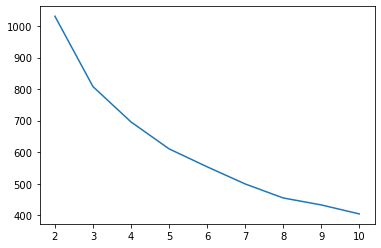

In [199]:
km = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(new_scaled)
    km.append([k, kmean.inertia_])
    
temp = pd.DataFrame(km)
plt.plot(temp[0] ,temp[1])

In [200]:
range_n_clusters= [2,3,4,5,6,7,8,9,10,11]
for num_clusters in range_n_clusters:
    kmeans= KMeans(n_clusters= num_clusters, max_iter=50)
    kmeans.fit(new_scaled)
    
    cluster_lables= kmeans.labels_
    silhouette_avg=silhouette_score(new_scaled, cluster_lables)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2813672429183498
For n_clusters=3, the silhouette score is 0.2760951365113056
For n_clusters=4, the silhouette score is 0.286270547386159
For n_clusters=5, the silhouette score is 0.24241407502598245
For n_clusters=6, the silhouette score is 0.25941456905397076
For n_clusters=7, the silhouette score is 0.244863396163734
For n_clusters=8, the silhouette score is 0.25400628865005787
For n_clusters=9, the silhouette score is 0.2383177558806016
For n_clusters=10, the silhouette score is 0.2447943523898735
For n_clusters=11, the silhouette score is 0.21976924443916498


In [201]:
kmeans= KMeans(n_clusters=3,max_iter= 50, random_state=100)
kmeans.fit(new_scaled)


KMeans(max_iter=50, n_clusters=3, random_state=100)

In [202]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [203]:
data_final["cluster_labels"]= kmeans.labels_

In [204]:
data_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2       5.82    553               2  
1       4.49        76.3       1.65   4090               1  
2      16.10        76.5       2.89   4460               1  
3      22.40        60.1       6.16   3530               2  
4       1.44        76.8       2.13  12200               1

In [206]:
data_final["cluster_labels"].value_counts()

1    83
2    47
0    37
Name: cluster_labels, dtype: int64

In [208]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = data_final)

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

<AxesSubplot:xlabel='gdpp', ylabel='income'>

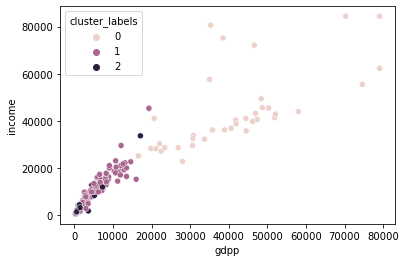

In [209]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = data_final)

In [210]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = data_final)

<AxesSubplot:xlabel='child_mort', ylabel='income'>

In [211]:
new_final = data_final[['child_mort','income','gdpp','cluster_labels']]
new_final.head()

child_mort  income   gdpp  cluster_labels
0        90.2    1610    553               2
1        16.6    9930   4090               1
2        27.3   12900   4460               1
3       119.0    5900   3530               2
4        10.3   19100  12200               1

In [214]:
sns.boxplot(data=data_final,x = 'cluster_labels',y='gdpp')
plt.show()

In [216]:
sns.boxplot(data=data_final,x = 'cluster_labels',y='child_mort')
plt.show()

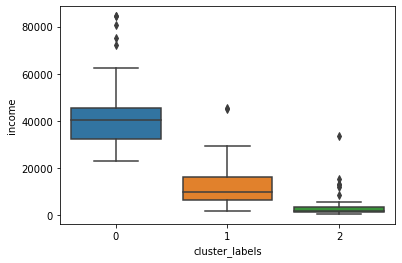

In [218]:
sns.boxplot(data=data_final,x = 'cluster_labels',y='income')
plt.show()

In [220]:
cluster_final = data_final[data_final['cluster_labels'] == 2]

In [225]:
cluster_final

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       153.4    15.30    6.91     64.7    1500   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       153.4    16.80   13.10     34.5    1220   
137              South Africa        53.7    28.60    8.94     27.4   12000   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster_labels  
0        9.440        56.2       5.82    553               2  
3       22.400        60.1       6.16   3530               2  
17       0.885        61.8       5.36   

In [227]:
top=cluster_final.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

In [229]:
top = top.reset_index().drop('index',axis=1)
top

country  child_mort  exports  health  imports  income  \
0              Sierra Leone       153.4     16.8   13.10     34.5    1220   
1                     Haiti       153.4     15.3    6.91     64.7    1500   
2                      Chad       150.0     36.8    4.53     43.5    1930   
3  Central African Republic       149.0     11.8    3.98     26.5     888   
4                      Mali       137.0     22.8    4.98     35.1    1870   

   inflation  life_expec  total_fer  gdpp  cluster_labels  
0      17.20        55.0       5.20   399               2  
1       5.45        32.1       3.33   662               2  
2       6.39        56.5       6.59   897               2  
3       2.01        47.5       5.21   446               2  
4       4.37        59.5       6.55   708               2

In [230]:
top["country"]

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
Name: country, dtype: object

In [232]:
data_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2       5.82    553               2  
1       4.49        76.3       1.65   4090               1  
2      16.10        76.5       2.89   4460               1  
3      22.40        60.1       6.16   3530               2  
4       1.44        76.8       2.13  12200               1

In [233]:
new_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.344006 -1.199279  0.301271 -0.076771 -0.851668   0.264996   -1.619705   
1   -0.547497 -0.498069 -0.088952  0.083204 -0.386946  -0.372073    0.648831   
2   -0.272510 -0.092925 -0.990631 -0.660465 -0.221053   1.122143    0.671403   
3    2.084159  0.838126 -1.490722 -0.163244 -0.612045   1.932958   -1.179541   
4   -0.709406  0.183663 -0.285958  0.528541  0.125254  -0.764610    0.705262   

   total_fer      gdpp  
0   1.902882 -0.702259  
1  -0.859973 -0.498726  
2  -0.038404 -0.477434  
3   2.128151 -0.530950  
4  -0.541946 -0.032042

In [235]:
plt.figure(figsize= (10,8))
mergings= linkage(new_scaled, method= "single", metric= "euclidean")
dendrogram(mergings)
plt.show()

In [236]:
plt.figure(figsize= (10,8))
mergings= linkage(new_scaled, method= "complete", metric= "euclidean")
dendrogram(mergings)
plt.show()

In [237]:
cluster_labels= cut_tree(mergings, n_clusters=3).reshape(-1)

In [238]:
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [239]:
data_final["Hierarchical_lables"]= cluster_labels

In [240]:
data_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels  \
0       9.44        56.2       5.82    553               2   
1       4.49        76.3       1.65   4090               1   
2      16.10        76.5       2.89   4460               1   
3      22.40        60.1       6.16   3530               2   
4       1.44        76.8       2.13  12200               1   

   Hierarchical_lables  
0                    0  
1                    1  
2                    1  
3                    0  
4                    1

In [241]:
sns.boxplot(data=data_final,x = 'Hierarchical_lables',y='child_mort')
plt.show()

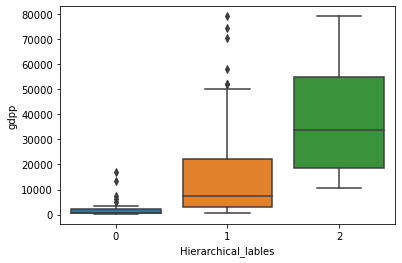

In [242]:
sns.boxplot(data=data_final,x = 'Hierarchical_lables',y='gdpp')
plt.show()

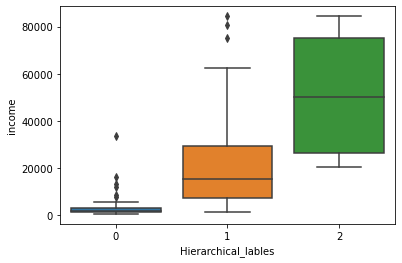

In [243]:
sns.boxplot(data=data_final,x = 'Hierarchical_lables',y='income')
plt.show()

In [244]:
new_final = data_final[['child_mort','income','gdpp','Hierarchical_lables']]
new_final.head()

child_mort  income   gdpp  Hierarchical_lables
0        90.2    1610    553                    0
1        16.6    9930   4090                    1
2        27.3   12900   4460                    1
3       119.0    5900   3530                    0
4        10.3   19100  12200                    1

In [245]:
cluster_final2 = data_final[data_final['Hierarchical_lables'] == 0]

In [246]:
top2=cluster_final2.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

In [247]:
top2 = top2.reset_index().drop('index',axis=1)
top2

country  child_mort  exports  health  imports  income  \
0              Sierra Leone       153.4     16.8   13.10     34.5    1220   
1                     Haiti       153.4     15.3    6.91     64.7    1500   
2                      Chad       150.0     36.8    4.53     43.5    1930   
3  Central African Republic       149.0     11.8    3.98     26.5     888   
4                      Mali       137.0     22.8    4.98     35.1    1870   

   inflation  life_expec  total_fer  gdpp  cluster_labels  Hierarchical_lables  
0      17.20        55.0       5.20   399               2                    0  
1       5.45        32.1       3.33   662               2                    0  
2       6.39        56.5       6.59   897               2                    0  
3       2.01        47.5       5.21   446               2                    0  
4       4.37        59.5       6.55   708               2                    0

In [248]:
top2["country"]

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
Name: country, dtype: object

# conclusion:-
The above results concludes that these are 5 countries indeed in a need of aid:

1.Haiti 

2.Sierra Leone

3.Chad

4.Central African Republic

5.Mali